In [1]:
import pandas as pd

# 加载数据集
data = pd.read_csv('data.csv')
print(data.head())

   Unnamed: 0      id  score  votes  year  TV  剧场版  漫画改  搞笑  原创  ...  喵帕斯  \
0           0  328561    7.0      2  2000   0    0    0   0   0  ...    0   
1           1   28389    7.2    630  2000  86    0    0   0   6  ...    0   
2           2   22956    6.3    198  2000   0    0   29   0   0  ...    0   
3           3  112705    6.7      6  2000   0    1    0   2   0  ...    0   
4           4  186592    6.9     17  2000   0    3    2   0   0  ...    0   

   户松遥  山本宽  萌系  嘟嘟噜  SOS团  少女系  ZEXCS  Air  宅  
0    0    0   0    0     0    0      0    0  0  
1    0    0   0    0     0    0      0    0  0  
2    0    0   0    0     0    0      0    0  0  
3    0    0   0    0     0    0      0    0  0  
4    0    0   0    0     0    0      0    0  0  

[5 rows x 408 columns]


In [2]:
# 对 'score' 进行正则化
data['score'] = data['score'] / 10.0

# 对 'votes' 使用最大值进行标准化
votes_max = data['votes'].max()
data['votes'] = data['votes'] / votes_max

# 对年份进行 Min-Max Scaling 正则化
year_min = data['year'].min()
year_max = data['year'].max()
data['year'] = (data['year'] - year_min) / (year_max - year_min)

# 对标签进行正则化 - 使用每列的最大值进行标准化
for column in data.columns[5:]:  # 假设从第六列开始为标签列
    max_value = data[column].max()
    if max_value > 0:
        data[column] = data[column] / max_value

# 显示正则化后的数据集的前几行
print(data.head())

   Unnamed: 0      id  score     votes  year        TV       剧场版       漫画改  \
0           0  328561   0.70  0.000081   0.0  0.000000  0.000000  0.000000   
1           1   28389   0.72  0.025361   0.0  0.050146  0.000000  0.000000   
2           2   22956   0.63  0.007971   0.0  0.000000  0.000000  0.012603   
3           3  112705   0.67  0.000242   0.0  0.000000  0.000218  0.000000   
4           4  186592   0.69  0.000684   0.0  0.000000  0.000653  0.000869   

         搞笑        原创  ...  喵帕斯  户松遥  山本宽   萌系  嘟嘟噜  SOS团  少女系  ZEXCS  Air  \
0  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0    0.0  0.0   
1  0.000000  0.001646  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0    0.0  0.0   
2  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0    0.0  0.0   
3  0.000484  0.000000  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0    0.0  0.0   
4  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0    0.0  0.0   

     宅  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows

In [3]:
from sklearn.model_selection import train_test_split

X, y = data.iloc[:, 4:], data.iloc[:, 2:4]
# X 和 y 已经被定义为特征和目标
# 分割比例：训练集80%，验证集10%，测试集10%

# 首先，分割出训练集（80%）
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# 接着，将剩余的20%数据再分为验证集和测试集（各占原始数据集的10%）
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 现在，X_train, y_train 是训练集
# X_val, y_val 是验证集
# X_test, y_test 是测试集

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(8949, 404) (8949, 2)
(1119, 404) (1119, 2)
(1119, 404) (1119, 2)


In [4]:
y1_train = y_train['score']
y2_train = y_train['votes']
y1_val = y_val['score']
y2_val = y_val['votes']
y1_test = y_test['score']
y2_test = y_test['votes']

print(y1_train.shape, y2_train.shape)
print(y1_val.shape, y2_val.shape)
print(y1_test.shape, y2_test.shape)

(8949,) (8949,)
(1119,) (1119,)
(1119,) (1119,)


In [63]:
import torch
import torch.nn as nn
import torch.optim as optim

class DNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)  # 第一个隐藏层
        self.fc2 = nn.Linear(256, 128)         # 第二个隐藏层
        self.fc3 = nn.Linear(128, 64)          # 第三个隐藏层
        # self.fc4 = nn.Linear(64, 32)           # 第四个隐藏层
        self.output = nn.Linear(64, output_size)  # 输出层

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        # x = self.relu(self.fc4(x))
        x = torch.sigmoid(self.output(x))  # 应用Sigmoid激活函数
        return x


In [59]:
num_epochs = 200  # 训练的轮数
batch_size = 128   # 批量大小

# 将 DataFrame 转换为 NumPy 数组
X_train_np = X_train.values
y1_train_np = y1_train.values
y2_train_np = y2_train.values
X_val_np = X_val.values
y1_val_np = y1_val.values
y2_val_np = y2_val.values
X_test_np = X_test.values
y1_test_np = y1_test.values
y2_test_np = y2_test.values

# 将 NumPy 数组转换为 PyTorch Tensor
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
y1_train_tensor = torch.tensor(y1_train_np, dtype=torch.float32)
y2_train_tensor = torch.tensor(y2_train_np, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_np, dtype=torch.float32)
y1_val_tensor = torch.tensor(y1_val_np, dtype=torch.float32)
y2_val_tensor = torch.tensor(y2_val_np, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32)
y1_test_tensor = torch.tensor(y1_test_np, dtype=torch.float32)
y2_test_tensor = torch.tensor(y2_test_np, dtype=torch.float32)

# 将数据集转换为 DataLoader，以便批处理和洗牌
train_data1 = torch.utils.data.TensorDataset(X_train_tensor, y1_train_tensor)
train_data2 = torch.utils.data.TensorDataset(X_train_tensor, y2_train_tensor)
train_loader1 = torch.utils.data.DataLoader(dataset=train_data1, batch_size=batch_size, shuffle=True)
train_loader2 = torch.utils.data.DataLoader(dataset=train_data2, batch_size=batch_size, shuffle=True)
val_data1 = torch.utils.data.TensorDataset(X_val_tensor, y1_val_tensor)
val_data2 = torch.utils.data.TensorDataset(X_val_tensor, y2_val_tensor)
val_loader1 = torch.utils.data.DataLoader(dataset=val_data1, batch_size=batch_size)
val_loader2 = torch.utils.data.DataLoader(dataset=val_data2, batch_size=batch_size)
test_data1 = torch.utils.data.TensorDataset(X_test_tensor, y1_test_tensor)
test_data2 = torch.utils.data.TensorDataset(X_test_tensor, y2_test_tensor)
test_loader1 = torch.utils.data.DataLoader(dataset=test_data1, batch_size=batch_size)
test_loader2 = torch.utils.data.DataLoader(dataset=test_data2, batch_size=batch_size)

In [75]:
# 训练scores的预测模型

# 初始化损失值列表
train_loss_values1 = []
val_loss_values1 = []

patience = 5  # 容忍的无改进epoch数
best_val_loss = float('inf')
counter = 0

# 创建模型实例时使用动态大小
model1 = DNN(X_train.shape[1], 1)
# 定义损失函数和优化器
criterion = nn.MSELoss()  # 均方误差损失，适合回归问题
optimizer = optim.Adam(model1.parameters(), lr=0.00001, weight_decay=1e-5)  # L2 正则化

for epoch in range(num_epochs):
    # 训练阶段
    model1.train()  # 设置模型为训练模式
    total_train_loss = 0
    for inputs, labels in train_loader1:
        # 前向传播
        outputs = model1(inputs)
        loss = criterion(outputs, labels)

        # 后向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader1)
    train_loss_values1.append(avg_train_loss)

    # 验证阶段
    model1.eval()  # 设置模型为评估模式
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader1:
            outputs = model1(inputs)
            val_loss = criterion(outputs, labels)
            total_val_loss += val_loss.item()

    avg_val_loss = total_val_loss / len(val_loader1)
    val_loss_values1.append(avg_val_loss)

    # 检查是否有改进
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print(f'Early stopping: Epoch {epoch}')
        break
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {avg_train_loss:.4f}, '
          f'Validation Loss: {avg_val_loss:.4f}')


d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([117])) that is different to the input size (torch.Size([117, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([95])) that is different to the input size (torch.Size([95, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  re

Epoch [1/200], Training Loss: 0.0215, Validation Loss: 0.0221
Epoch [2/200], Training Loss: 0.0211, Validation Loss: 0.0217
Epoch [3/200], Training Loss: 0.0206, Validation Loss: 0.0212
Epoch [4/200], Training Loss: 0.0201, Validation Loss: 0.0207
Epoch [5/200], Training Loss: 0.0195, Validation Loss: 0.0201
Epoch [6/200], Training Loss: 0.0190, Validation Loss: 0.0196
Epoch [7/200], Training Loss: 0.0184, Validation Loss: 0.0191
Epoch [8/200], Training Loss: 0.0179, Validation Loss: 0.0186
Epoch [9/200], Training Loss: 0.0174, Validation Loss: 0.0180
Epoch [10/200], Training Loss: 0.0168, Validation Loss: 0.0175
Epoch [11/200], Training Loss: 0.0162, Validation Loss: 0.0170
Epoch [12/200], Training Loss: 0.0157, Validation Loss: 0.0164
Epoch [13/200], Training Loss: 0.0151, Validation Loss: 0.0159
Epoch [14/200], Training Loss: 0.0146, Validation Loss: 0.0155
Epoch [15/200], Training Loss: 0.0142, Validation Loss: 0.0152
Epoch [16/200], Training Loss: 0.0138, Validation Loss: 0.0149
E

In [113]:
# # 保存 DNN 模型参数
# torch.save(model.state_dict(), 'dnn_model.pth')

In [ ]:
# # 重新创建模型实例
# model = DNN(input_size, output_size)
# # 加载之前保存的参数
# model.load_state_dict(torch.load('dnn_model.pth'))

In [118]:
# # 将验证损失保存为文本文件
# with open('dnn_train_loss.txt', 'w') as f:
#     for loss in train_loss_values:
#         f.write(f"{loss}\n")

# with open('dnn_val_loss.txt', 'w') as f:
#     for loss in val_loss_values:
#         f.write(f"{loss}\n")

In [ ]:
# # 使用文本文件加载
# with open('dnn_train_loss.txt', 'r') as f:
#     train_loss_values = [float(line.strip()) for line in f]

# with open('dnn_val_loss.txt', 'r') as f:
#     val_loss_values = [float(line.strip()) for line in f]

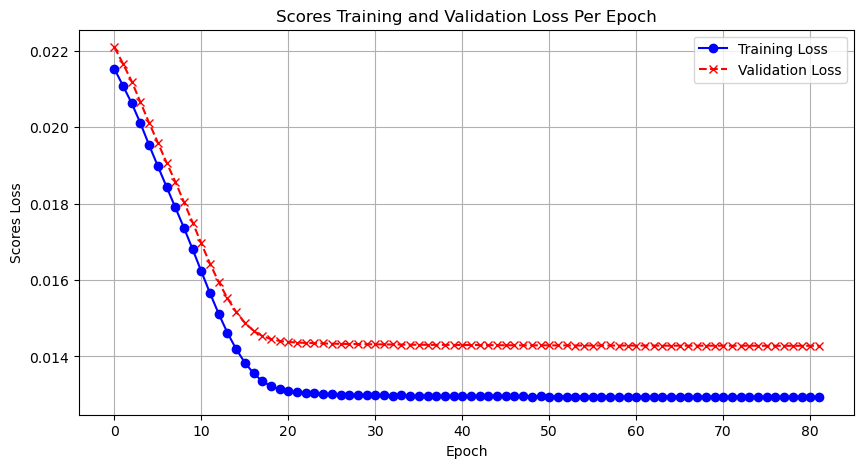

In [76]:
import matplotlib.pyplot as plt

# 绘制训练和验证损失曲线
plt.figure(figsize=(10, 5))
plt.plot(train_loss_values1[:], label='Training Loss', marker='o', linestyle='-', color='b')
plt.plot(val_loss_values1[:], label='Validation Loss', marker='x', linestyle='--', color='r')
plt.title('Scores Training and Validation Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Scores Loss')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# 测试模型
model1.eval()  # 设置模型为评估模式
total_test_loss1 = 0
with torch.no_grad():
    for inputs, labels in test_loader1:
        outputs = model1(inputs)
        test_loss = criterion(outputs, labels)
        total_test_loss1 += test_loss.item()

avg_test_loss1 = total_test_loss1 / len(test_loader1)

print(f'Test Loss for scores: {avg_test_loss1:.4f}')

Test Loss for scores: 0.0129


In [78]:
# 训练votes的预测模型

# 初始化损失值列表
train_loss_values2 = []
val_loss_values2 = []

patience = 5  # 容忍的无改进epoch数
best_val_loss = float('inf')
counter = 0

# 创建模型实例时使用动态大小
model2 = DNN(X_train.shape[1], 1)
# 定义损失函数和优化器
criterion = nn.MSELoss()  # 均方误差损失，适合回归问题
optimizer = optim.Adam(model2.parameters(), lr=0.00001, weight_decay=1e-5)  # L2 正则化

for epoch in range(num_epochs):
    # 训练阶段
    model2.train()  # 设置模型为训练模式
    total_train_loss = 0
    for inputs, labels in train_loader2:
        # 前向传播
        outputs = model2(inputs)
        loss = criterion(outputs, labels)

        # 后向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader2)
    train_loss_values2.append(avg_train_loss)

    # 验证阶段
    model2.eval()  # 设置模型为评估模式
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader2:
            outputs = model2(inputs)
            val_loss = criterion(outputs, labels)
            total_val_loss += val_loss.item()

    avg_val_loss = total_val_loss / len(val_loader2)
    val_loss_values2.append(avg_val_loss)

    # 检查是否有改进
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print(f'Early stopping: Epoch {epoch}')
        break
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {avg_train_loss:.4f}, '
          f'Validation Loss: {avg_val_loss:.4f}')

d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([117])) that is different to the input size (torch.Size([117, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([95])) that is different to the input size (torch.Size([95, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  re

Epoch [1/200], Training Loss: 0.2242, Validation Loss: 0.2240
Epoch [2/200], Training Loss: 0.2212, Validation Loss: 0.2210
Epoch [3/200], Training Loss: 0.2182, Validation Loss: 0.2179
Epoch [4/200], Training Loss: 0.2150, Validation Loss: 0.2145
Epoch [5/200], Training Loss: 0.2115, Validation Loss: 0.2107
Epoch [6/200], Training Loss: 0.2075, Validation Loss: 0.2065
Epoch [7/200], Training Loss: 0.2029, Validation Loss: 0.2015
Epoch [8/200], Training Loss: 0.1974, Validation Loss: 0.1954
Epoch [9/200], Training Loss: 0.1909, Validation Loss: 0.1887
Epoch [10/200], Training Loss: 0.1843, Validation Loss: 0.1822
Epoch [11/200], Training Loss: 0.1779, Validation Loss: 0.1759
Epoch [12/200], Training Loss: 0.1713, Validation Loss: 0.1687
Epoch [13/200], Training Loss: 0.1635, Validation Loss: 0.1603
Epoch [14/200], Training Loss: 0.1545, Validation Loss: 0.1507
Epoch [15/200], Training Loss: 0.1444, Validation Loss: 0.1401
Epoch [16/200], Training Loss: 0.1333, Validation Loss: 0.1286
E

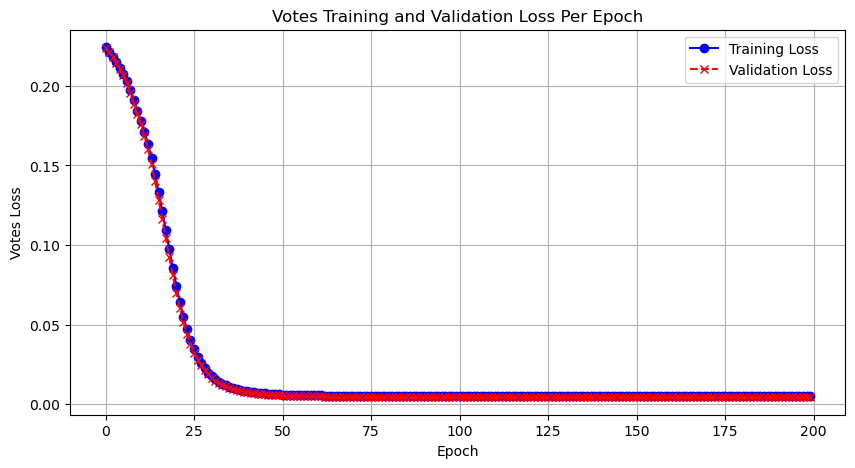

In [79]:
import matplotlib.pyplot as plt

# 绘制训练和验证损失曲线
plt.figure(figsize=(10, 5))
plt.plot(train_loss_values2[:], label='Training Loss', marker='o', linestyle='-', color='b')
plt.plot(val_loss_values2[:], label='Validation Loss', marker='x', linestyle='--', color='r')
plt.title('Votes Training and Validation Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Votes Loss')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# 测试模型
model2.eval()  # 设置模型为评估模式
total_test_loss2 = 0
with torch.no_grad():
    for inputs, labels in test_loader2:
        outputs = model2(inputs)
        test_loss = criterion(outputs, labels)
        total_test_loss2 += test_loss.item()

avg_test_loss2 = total_test_loss2 / len(test_loader2)

print(f'Test Loss: {avg_test_loss2:.4f}')

Test Loss: 0.0056


d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([95])) that is different to the input size (torch.Size([95, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [113]:
import numpy as np
# 随机猜测模型
def random_guess_model(X, min_val, max_val):
    """ 对于每个输入样本随机生成两个预测值。"""
    random_prediction = np.random.uniform(min_val, max_val, X.shape[0])
    return random_prediction

# 计算随机猜测模型的损失
random_loss1 = criterion(torch.tensor(random_guess_model(X_test_np, 0, 1)), y1_test_tensor)
random_loss2 = criterion(torch.tensor(random_guess_model(X_test_np, 0, 1)), y2_test_tensor)
print(f'Random Loss for scores: {random_loss1:.4f}')
print(f'Random Loss for votes: {random_loss2:.4f}')

Random Loss for scores: 0.1078
Random Loss for votes: 0.3109


In [115]:
# 线性模型
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

In [117]:
num_epochs = 200  # 训练轮数
batch_size = 128   # 批量大小

# 创建线性模型实例
linear_model1 = LinearModel(X_train.shape[1], 1)

# 可以使用相同的损失函数和优化器
# 如果需要，也可以为线性模型选择不同的优化器或学习率
linear_optimizer = optim.Adam(linear_model1.parameters(), lr=0.001, weight_decay=1e-5)

# 创建数据加载器

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader1):
        # 前向传播
        outputs = linear_model1(inputs)
        loss = criterion(outputs, labels)

        # 后向传播和优化
        linear_optimizer.zero_grad()
        loss.backward()
        linear_optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([117])) that is different to the input size (torch.Size([117, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [114]:
# # 保存线性模型参数
# torch.save(linear_model.state_dict(), 'linear_model.pth')

In [ ]:
# # 重新创建模型实例
# linear_model = LinearModel(input_size, output_size)

# # 加载之前保存的参数
# linear_model.load_state_dict(torch.load('linear_model.pth'))

In [119]:
linear_model1.eval()  # 设置模型为评估模式
total_test_loss = 0
with torch.no_grad():
    for inputs, labels in test_loader1:
        outputs = linear_model1(inputs)
        test_loss = criterion(outputs, labels)
        total_test_loss += test_loss.item()

avg_test_loss = total_test_loss / len(test_loader1)
print(f'Test Loss for scores: {avg_test_loss:.4f}')

Test Loss for scores: 0.0129


d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([95])) that is different to the input size (torch.Size([95, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [120]:
num_epochs = 200  # 训练轮数
batch_size = 128   # 批量大小

# 创建线性模型实例
linear_model2 = LinearModel(X_train.shape[1], 1)

# 可以使用相同的损失函数和优化器
# 如果需要，也可以为线性模型选择不同的优化器或学习率
linear_optimizer = optim.Adam(linear_model2.parameters(), lr=0.001, weight_decay=1e-5)

# 创建数据加载器

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader2):
        # 前向传播
        outputs = linear_model2(inputs)
        loss = criterion(outputs, labels)

        # 后向传播和优化
        linear_optimizer.zero_grad()
        loss.backward()
        linear_optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([117])) that is different to the input size (torch.Size([117, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [121]:
linear_model2.eval()  # 设置模型为评估模式
total_test_loss = 0
with torch.no_grad():
    for inputs, labels in test_loader2:
        outputs = linear_model2(inputs)
        test_loss = criterion(outputs, labels)
        total_test_loss += test_loss.item()

avg_test_loss = total_test_loss / len(test_loader2)
print(f'Test Loss for votes: {avg_test_loss:.4f}')

Test Loss for votes: 0.0056


d:\Anaconda3\envs\mlproject\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([95])) that is different to the input size (torch.Size([95, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
